<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=258015710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset-full/bank-full.csv
/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz
%pip install xlearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.0 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is 

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 16.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 25.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 11.4 MB/s  0:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 6.8 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
#%pip freeze > requirements.txt

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML
import xlearn as xl

In [7]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [8]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')
original_df = pd.read_csv('/kaggle/input/bank-marketing-dataset-full/bank-full.csv', delimiter=';')

In [9]:
!ls /kaggle/input/playground-series-s5e8

sample_submission.csv  test.csv  train.csv


In [10]:
train_df.shape, original_df.shape

((750000, 17), (45211, 17))

In [11]:
train_df.shape, original_df.shape

((750000, 17), (45211, 17))

## Exploratory Data Analysis

In [12]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [13]:
original_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
# Map 'yes'/'no' to 1/0 in the target variable 'y'
original_df['y'] = original_df['y'].map({'yes': 1, 'no': 0})
original_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [15]:
train_df = pd.concat([train_df, original_df], ignore_index=True)
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
795207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
795208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
795209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [16]:
# Read first few lines as text to see the actual format
with open('/kaggle/input/bank-marketing-dataset-full/bank-full.csv', 'r') as f:
    for i in range(3):
        print(repr(f.readline()))

'"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"\n'
'58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"\n'
'44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"\n'


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795211 entries, 0 to 795210
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        795211 non-null  int64 
 1   job        795211 non-null  object
 2   marital    795211 non-null  object
 3   education  795211 non-null  object
 4   default    795211 non-null  object
 5   balance    795211 non-null  int64 
 6   housing    795211 non-null  object
 7   loan       795211 non-null  object
 8   contact    795211 non-null  object
 9   day        795211 non-null  int64 
 10  month      795211 non-null  object
 11  duration   795211 non-null  int64 
 12  campaign   795211 non-null  int64 
 13  pdays      795211 non-null  int64 
 14  previous   795211 non-null  int64 
 15  poutcome   795211 non-null  object
 16  y          795211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.1+ MB


In [18]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64


In [20]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
day          0.0
poutcome     0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
contact      0.0
job          0.0
loan         0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
y            0.0
dtype: float64


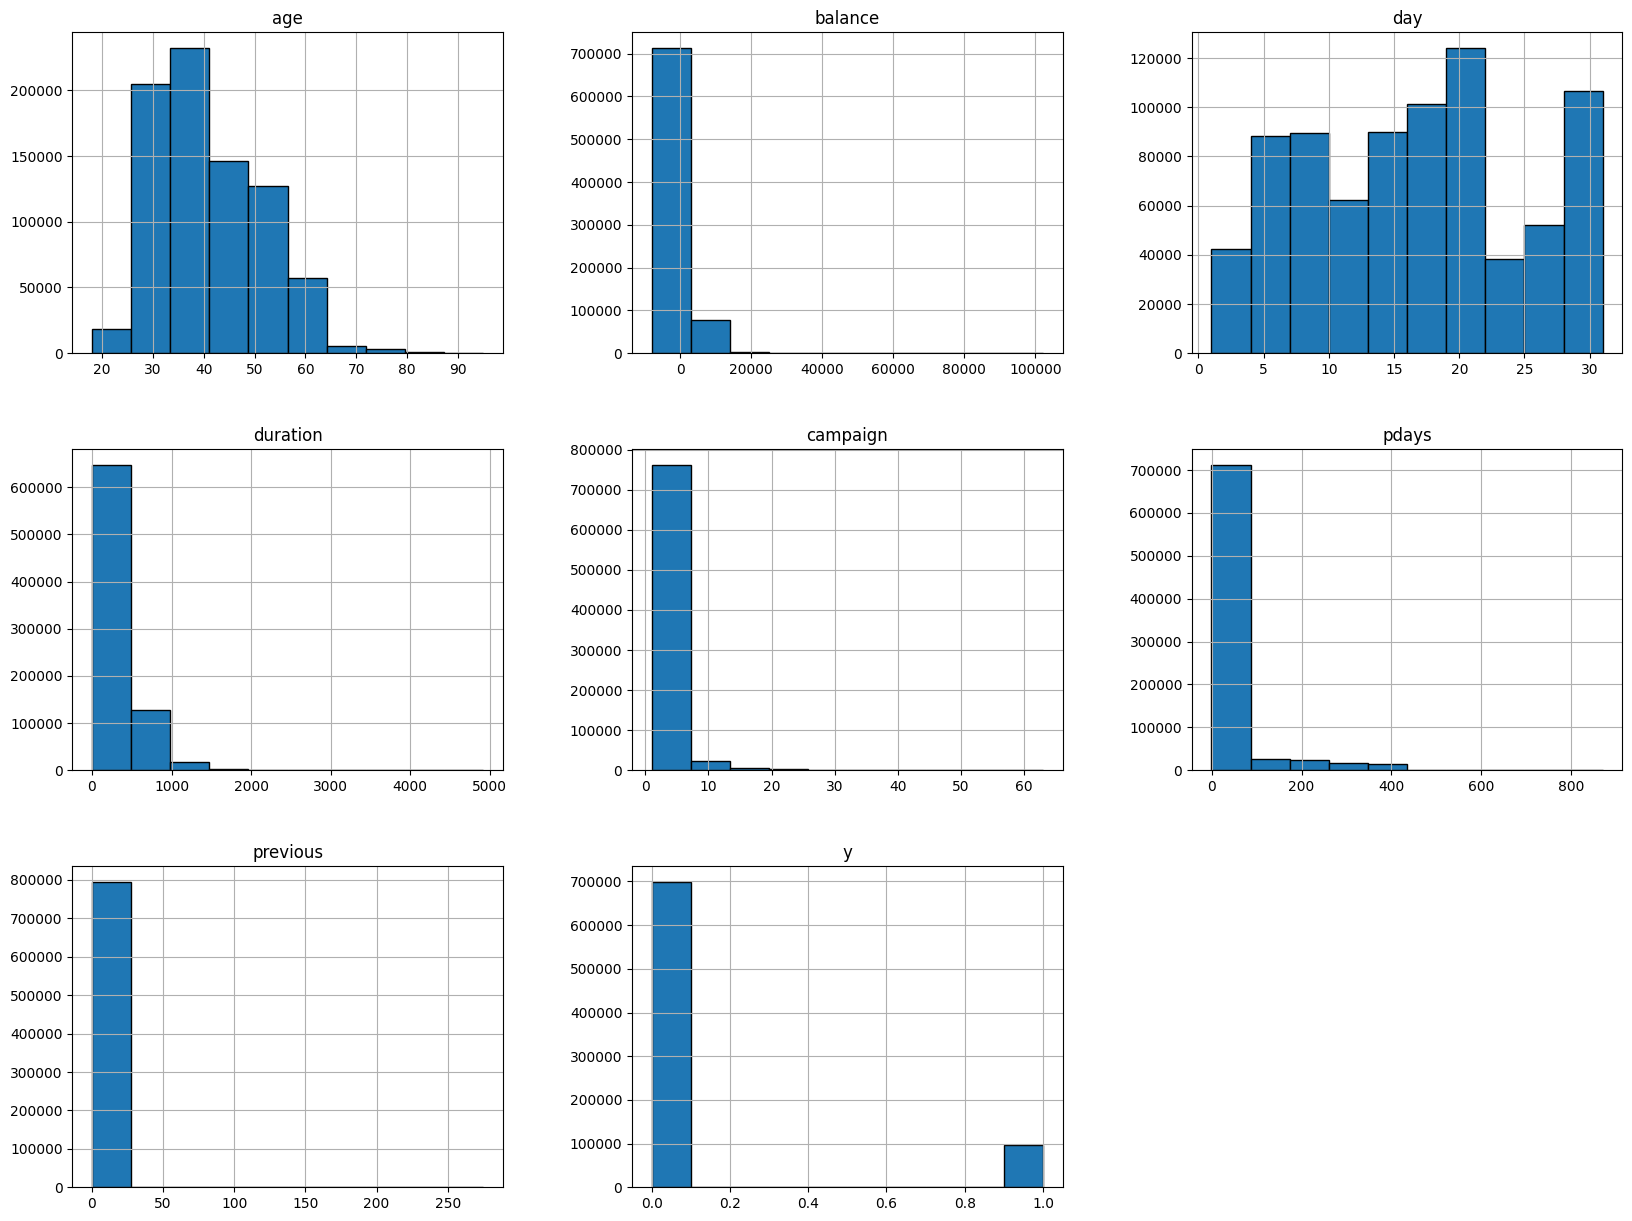

In [21]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [22]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,795211.0,40.926953,10.129098,18.0,33.0,39.0,48.0,95.0
balance,795211.0,1213.061980,2848.603881,-8019.0,0.0,624.0,1390.0,102127.0
day,795211.0,16.099540,8.255231,1.0,9.0,17.0,21.0,31.0
duration,795211.0,256.339096,271.723766,0.0,91.0,135.0,347.5,4918.0
campaign,795211.0,2.587630,2.741838,1.0,1.0,2.0,3.0,63.0
pdays,795211.0,23.423889,78.901465,-1.0,-1.0,-1.0,-1.0,871.0
previous,795211.0,0.314566,1.410369,0.0,0.0,0.0,0.0,275.0
y,795211.0,0.120442,0.325478,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [23]:
splits = RandomSplitter(valid_pct=0.2)(range_of(original_df))

In [24]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [25]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [26]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [27]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [28]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
24857,10,2,2,1,2,1,1,10,4,1.591567,-0.187146,0.233862,-0.565805,-0.583281,-0.302196,-0.226757
23921,6,2,1,1,1,1,2,6,4,1.888968,-0.409676,-1.100715,-0.723721,-0.583281,-0.302196,-0.226757
38618,2,2,2,1,2,1,2,9,4,0.401962,-0.018727,0.233862,-0.911017,-0.207715,-0.302196,-0.226757
7500,10,1,3,1,2,1,1,4,4,0.897630,-0.901743,-1.222040,-0.503373,-0.207715,-0.302196,-0.226757
16922,5,3,3,1,1,1,1,2,4,-0.886777,-0.409676,0.233862,-0.598857,0.543418,-0.302196,-0.226757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,1,2,2,1,2,1,1,10,4,-0.985910,-0.116465,0.355187,-0.290370,-0.583281,-0.302196,-0.226757
33016,5,3,3,1,2,1,1,1,1,-0.291974,-0.066751,0.476512,3.730985,1.294551,1.665522,2.033879
33036,5,2,2,1,1,1,3,7,4,1.888968,0.059395,0.112537,-0.709031,-0.583281,-0.302196,-0.226757
11092,2,2,4,1,2,1,3,9,4,-0.291974,-0.254446,-1.222040,-0.246300,-0.583281,-0.302196,-0.226757


Below we define a function to help us do stratified kfold cross validation which we use below

In [29]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## FFMS

## Neural Networks

In [30]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.033113110810518265, valley=0.004365158267319202)

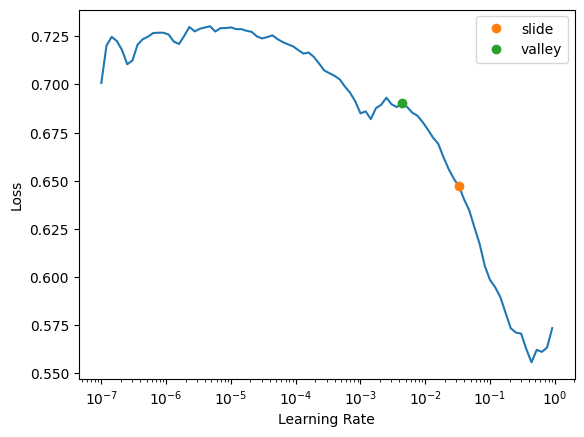

In [31]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [32]:
%%time
learn.fit_one_cycle(30, 1.025e-2)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.207315,0.208067,0.933504,00:06
1,0.192814,0.188901,0.949253,00:06
2,0.187020,0.188061,0.945516,00:06
3,0.171647,0.191924,0.946331,00:06
4,0.175840,0.183495,0.949073,00:06
5,0.179306,0.196303,0.938544,00:06
6,0.178077,0.180662,0.951033,00:06
7,0.175269,0.191035,0.945271,00:06
8,0.178395,0.180429,0.950461,00:25
9,0.164165,0.178326,0.952423,00:08


CPU times: user 7min 24s, sys: 2.25 s, total: 7min 26s
Wall time: 3min 46s


In [33]:
dl = test_dl

In [34]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [35]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [36]:
a_preds.shape

torch.Size([250000, 2])

In [37]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [38]:
nn_preds_x

tensor([[2.0284e-01, 7.9716e-01],
        [9.9965e-01, 3.4861e-04],
        [9.9923e-01, 7.6870e-04],
        ...,
        [9.3914e-01, 6.0863e-02],
        [1.0000e+00, 1.5053e-06],
        [5.4117e-01, 4.5883e-01]])

In [39]:
nn_preds_y

tensor([[9.9836e-01, 1.6360e-03],
        [7.0492e-01, 2.9508e-01],
        [1.0000e+00, 3.9261e-08],
        ...,
        [2.8447e-01, 7.1553e-01],
        [9.9988e-01, 1.1903e-04],
        [8.9028e-01, 1.0972e-01]])

In [40]:
a_preds

tensor([[9.9836e-01, 1.6360e-03],
        [7.0492e-01, 2.9508e-01],
        [1.0000e+00, 3.9261e-08],
        ...,
        [2.8447e-01, 7.1553e-01],
        [9.9988e-01, 1.1903e-04],
        [8.9028e-01, 1.0972e-01]])

In [41]:
nn_preds_proba

tensor([1.6360e-03, 2.9508e-01, 3.9261e-08,  ..., 7.1553e-01, 1.1903e-04,
        1.0972e-01])

In [42]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([1.6360e-03, 2.9508e-01, 3.9261e-08,  ..., 7.1553e-01, 1.1903e-04,
        1.0972e-01])

In [43]:
final_preds.shape

torch.Size([250000])

In [44]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,1.635981e-03
750001,2.950788e-01
750002,3.926109e-08
750003,1.575671e-05
750004,4.942028e-02
...,...
999995,6.968678e-05
999996,4.992523e-02
999997,7.155280e-01


## Decision Trees

### Random Forests

In [45]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 13.9 s, sys: 79.7 ms, total: 14 s
Wall time: 12.4 s


0.9550204617848682

In [46]:
rf_preds_probs,rf_preds_probs.shape

(tensor([0.0037, 0.1837, 0.0000,  ..., 0.6572, 0.0051, 0.1604]),
 torch.Size([250000]))

In [47]:
rf_preds_probs 

tensor([0.0037, 0.1837, 0.0000,  ..., 0.6572, 0.0051, 0.1604])

In [48]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [49]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.448075
10,balance,0.096073
9,age,0.075212
7,month,0.066983
11,day,0.060379
8,poutcome,0.041706
4,housing,0.035164
6,contact,0.032971
14,pdays,0.032336
0,job,0.030364


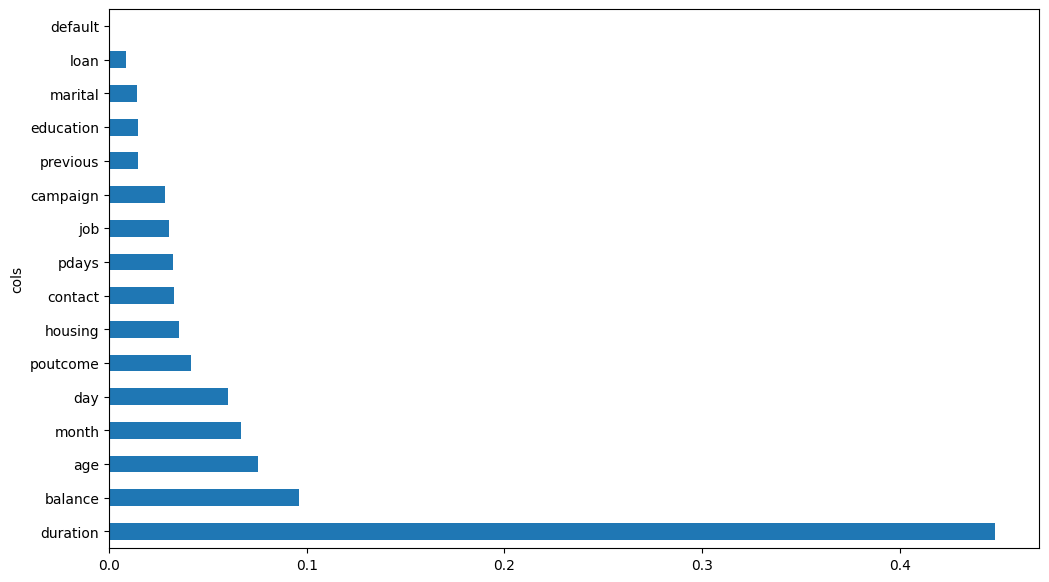

In [50]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [51]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [52]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.951545
Training fold 2/5...
Fold 2 roc_auc: 0.955317
Training fold 3/5...
Fold 3 roc_auc: 0.954396
Training fold 4/5...
Fold 4 roc_auc: 0.958553
Training fold 5/5...
Fold 5 roc_auc: 0.954636

Mean roc_auc: 0.954889


In [53]:
rf_oof_predictions.shape, rf_test_predictions.shape

((36169,), (9042,))

In [54]:
rf_oof_predictions

array([0.        , 0.00215909, 0.00853333, ..., 0.00061292, 0.00723887, 0.00355811])

In [55]:
rf_test_predictions

array([0.66670597, 0.        , 0.00864302, ..., 0.06617455, 0.        , 0.40169075])

In [56]:
rf_mean_score, rf_fold_scores

(0.9548893814924417,
 [0.9515448788804842,
  0.9553170853291142,
  0.9543957758085141,
  0.9585533508246675,
  0.9546358166194289])

In [57]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003715
750001,0.183743
750002,0.000000
750003,0.000000
750004,0.049060
...,...
999995,0.000000
999996,0.126894
999997,0.657234


## Gradient Boosting

### XGBoost

In [58]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 2.1 s, sys: 28.9 ms, total: 2.13 s
Wall time: 1.14 s


0.956658604679021

In [59]:
xgb_preds_proba

tensor([2.1424e-03, 1.8623e-01, 6.0350e-05,  ..., 9.5187e-01, 2.8978e-04,
        4.8986e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

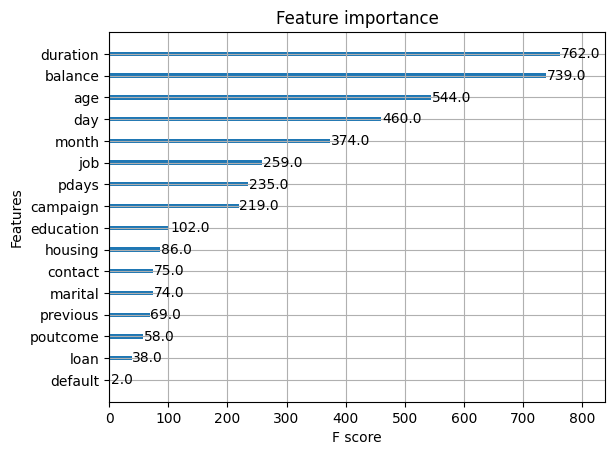

In [60]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [61]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.953347
Training fold 2/5...
Fold 2 roc_auc: 0.954381
Training fold 3/5...
Fold 3 roc_auc: 0.956426
Training fold 4/5...
Fold 4 roc_auc: 0.960912
Training fold 5/5...
Fold 5 roc_auc: 0.956580

Mean roc_auc: 0.956329


In [63]:
xgb_oof_predictions

array([2.14808853e-03, 2.02505238e-04, 8.71159777e-04, ..., 5.21075737e-04, 6.20602688e-04, 9.94131842e-05])

In [64]:
xgb_test_predictions

array([8.54093611e-01, 1.08801642e-04, 3.79184585e-04, ..., 2.60184675e-02, 1.66151804e-04, 2.79800102e-01])

In [65]:
xgb_mean_score

0.9563292907358315

In [66]:
 xgb_fold_scores

[0.9533467709891126,
 0.9543813259931946,
 0.9564257557459862,
 0.9609122631141251,
 0.9565803378367395]

In [67]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002142
750001,0.186225
750002,0.000060
750003,0.000125
750004,0.055512
...,...
999995,0.000537
999996,0.031878
999997,0.951871


### LGBM

In [68]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 4352, number of negative: 31817
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 36169, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120324 -> initscore=-1.989365
[LightGBM] [Info] Start training from score -1.989365
CPU times: user 4.9 s, sys: 101 ms, total: 5 s
Wall time: 2.58 s


0.9587209130132195

In [69]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9917, 0.0083],
         [0.8580, 0.1420],
         [0.9989, 0.0011],
         ...,
         [0.1211, 0.8789],
         [0.9970, 0.0030],
         [0.8650, 0.1350]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

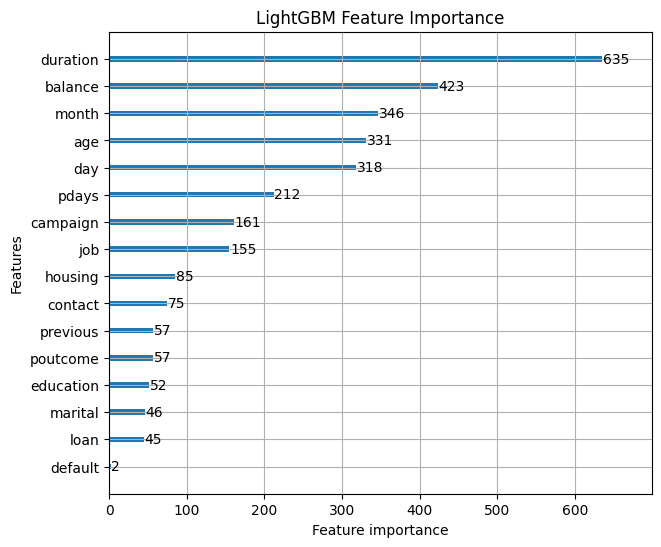

In [70]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [71]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [72]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 3482, number of negative: 25453
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 28935, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120339 -> initscore=-1.989227
[LightGBM] [Info] Start training from score -1.989227
Fold 1 roc_auc: 0.955425
Training fold 2/5...
[LightGBM] [Info] Number of positive: 3482, number of negative: 25453
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the t

In [73]:
lgbm_oof_predictions

array([0.00322412, 0.00093943, 0.0021238 , ..., 0.00096048, 0.00351972, 0.00151628])

In [74]:
lgbm_test_predictions

array([8.52137173e-01, 5.66871981e-04, 2.04443825e-03, ..., 5.81167221e-02, 1.14762941e-03, 4.98134832e-01])

In [75]:
 lgbm_mean_score

0.9583183966644914

In [76]:
lgbm_fold_scores

[0.9554245504526178,
 0.9578904686563068,
 0.9567794076438971,
 0.9629280789322167,
 0.958569477637419]

In [77]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.008308
750001,0.141977
750002,0.001097
750003,0.000673
750004,0.069484
...,...
999995,0.001277
999996,0.105970
999997,0.878938


### CatBoost

In [78]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 31.2 s, sys: 4.56 s, total: 35.8 s
Wall time: 9.37 s


0.9590576029329237

#### CatBoost Feature Importance

In [79]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   37.517699
6    contact   10.757951
10   balance    9.622842
7      month    8.990680
11       day    6.243305
4    housing    5.051204
9        age    4.526315
13  campaign    3.963714
0        job    3.134792
8   poutcome    2.295301


#### Cross validation - CatBoost

In [80]:
cat_model = CatBoostClassifier()
cat_model

In [81]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.043347
0:	learn: 0.6233114	total: 8.97ms	remaining: 8.96s
1:	learn: 0.5667272	total: 16.3ms	remaining: 8.13s
2:	learn: 0.5338661	total: 23.6ms	remaining: 7.83s
3:	learn: 0.4860163	total: 30.5ms	remaining: 7.59s
4:	learn: 0.4463557	total: 37.5ms	remaining: 7.46s
5:	learn: 0.4232600	total: 44.1ms	remaining: 7.3s
6:	learn: 0.3914767	total: 51.4ms	remaining: 7.29s
7:	learn: 0.3652963	total: 58.1ms	remaining: 7.21s
8:	learn: 0.3445124	total: 65.1ms	remaining: 7.17s
9:	learn: 0.3323308	total: 71.6ms	remaining: 7.09s
10:	learn: 0.3177860	total: 78.6ms	remaining: 7.07s
11:	learn: 0.3038946	total: 86.2ms	remaining: 7.1s
12:	learn: 0.2901366	total: 93.4ms	remaining: 7.09s
13:	learn: 0.2789503	total: 101ms	remaining: 7.09s
14:	learn: 0.2689420	total: 108ms	remaining: 7.08s
15:	learn: 0.2606536	total: 115ms	remaining: 7.05s
16:	learn: 0.2560716	total: 121ms	remaining: 7.02s
17:	learn: 0.2492469	total: 128ms	remaining: 7s
18:	learn: 0.2457549	total: 135ms

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [82]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([5.6539e-03, 1.6149e-01, 7.8249e-05,  ..., 9.3806e-01, 1.1727e-03,
        3.5035e-01])

In [83]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([8.9027e-01, 2.2463e-04, 1.4319e-03,  ..., 3.5165e-02, 4.3852e-04,
        2.3594e-01])

In [84]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9590994414448557

#### CatBoost + LGBM

In [85]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([8.7367e-03, 1.3936e-01, 5.9665e-04,  ..., 9.0160e-01, 2.5306e-03,
        1.7293e-01])

In [86]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([9042])

In [87]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9598906297257562

#### XGBoost + LGBM

In [88]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([5.2252e-03, 1.6410e-01, 5.7876e-04,  ..., 9.1540e-01, 1.6477e-03,
        3.1243e-01])

In [89]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9591423809702593

In [90]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.005225
750001,0.164101
750002,0.000579
750003,0.000399
750004,0.062498
...,...
999995,0.000907
999996,0.068924
999997,0.915404


#### CatBoost + LGBM + XGBoost

In [91]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([6.5386e-03, 1.5498e-01, 4.1789e-04,  ..., 9.1835e-01, 1.7837e-03,
        2.7857e-01])

In [92]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9597697384465427

### Stacking

In [93]:
stacking_estimators = [
    ('cat_boost',cat_model),
    #('rf',rf_model),
    ('lgbm',lgbm_model),
    ('xgb',xgb_model),
]

#stacking_classifier_cat_xgb_lgbm= StackingClassifier(
    #estimators=stacking_estimators,
    #final_estimator=LogisticRegression(),
    #cv=5
#)
stacking_classifier_cat_lgbm= StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=lgb.LGBMClassifier(),
    cv=5
)
stacking_classifier_cat_lgbm.fit(X_train, y_train)


stacking_preds_cat_lgbm = (stacking_classifier_cat_lgbm.predict_proba(test_dl.xs))[:,1]
stacking_preds_cat_lgbm_x = (stacking_classifier_cat_lgbm.predict_proba(X_test))[:,1]

stacking_score_cat_lgbm = roc_auc_score(y_test, stacking_preds_cat_lgbm_x)

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

Learning rate set to 0.047681
0:	learn: 0.6185514	total: 10.3ms	remaining: 10.3s
1:	learn: 0.5585909	total: 18.5ms	remaining: 9.22s
2:	learn: 0.5091108	total: 27ms	remaining: 8.97s
3:	learn: 0.4642461	total: 35.6ms	remaining: 8.86s
4:	learn: 0.4291582	total: 44ms	remaining: 8.75s
5:	learn: 0.3953407	total: 52.3ms	remaining: 8.67s
6:	learn: 0.3665525	total: 60.5ms	remaining: 8.59s
7:	learn: 0.3417262	total: 68.8ms	remaining: 8.53s
8:	learn: 0.3212635	total: 76.8ms	remaining: 8.46s
9:	learn: 0.3049249	total: 85.2ms	remaining: 8.43s
10:	learn: 0.2908242	total: 93.5ms	remaining: 8.41s
11:	learn: 0.2837515	total: 102ms	remaining: 8.36s
12:	learn: 0.2738617	total: 109ms	remaining: 8.3s
13:	learn: 0.2671713	total: 118ms	remaining: 8.28s
14:	learn: 0.2583960	total: 126ms	remaining: 8.26s
15:	learn: 0.2511542	total: 134ms	remaining: 8.24s
16:	learn: 0.2449084	total: 143ms	remaining: 8.24s
17:	learn: 0.2393498	total: 151ms	remaining: 8.23s
18:	learn: 0.2346956	total: 159ms	remaining: 8.21s
19:	l

In [94]:
stacking_preds_cat_lgbm.shape

(250000,)

In [95]:
stacking_preds_cat_lgbm = torch.tensor(stacking_preds_cat_lgbm)

In [96]:
stacking_preds_cat_lgbm

tensor([5.5621e-04, 1.0352e-01, 2.6965e-05,  ..., 9.6809e-01, 3.7774e-05,
        1.7400e-01], dtype=torch.float64)

In [97]:
!rm submission.csv
sub_df['y'] = stacking_preds_cat_lgbm 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000556
750001,0.103525
750002,0.000027
750003,0.000695
750004,0.069687
...,...
999995,0.000012
999996,0.086609
999997,0.968092


## AutoML

### AutoGluon

In [98]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
#Time_limit = 3600*10
Time_limit = 3600
problem_type='binary'

In [99]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    #train_data, presets='best_quality', time_limit=Time_limit,
    #ag_args_fit={'num_gpus': 2}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    
    #}
#)

#results = predictor.fit_summary()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 12.2 µs


In [100]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.2 µs


In [101]:
%%time
#results = predictor.fit_summary()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [102]:
%%time
#predictor.leaderboard()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [103]:
%%time
#autogluon_preds = predictor.predict(test_df)
#autogluon_preds_proba = predictor.predict_proba(test_df)
#autogluon_preds_proba.head(5)  

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [104]:
#predictions = autogluon_preds_proba

In [105]:
%%time
#autogluon_preds = predictor.predict(test_df)
#autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
#autogluon_preds_proba.head(5)  

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


In [106]:
#autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

In [107]:
#autogluon_preds_proba.values

In [108]:
#autogluon_preds_proba_values = torch.tensor(autogluon_preds_proba.values)

In [109]:
#autogluon_cat_lgbm_xgb_preds = (cat_lgbm_xgb_preds + autogluon_preds_proba_values)/2
#autogluon_cat_lgbm_xgb_preds,autogluon_cat_lgbm_xgb_preds.shape

In [110]:
#!rm submission.csv
#sub_df['y'] = autogluon_cat_lgbm_xgb_preds
#sub_df.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

In [111]:
#!rm submission.csv
#sub_df['y'] = autogluon_preds_proba.values
#sub_df.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

In [112]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

In [113]:
!rm submission.csv
sub_df['y'] = cat_lgbm_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.008737
750001,0.139361
750002,0.000597
750003,0.000358
750004,0.074497
...,...
999995,0.000941
999996,0.118359
999997,0.901596


### Ranking

In [114]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
5,CatBoost_LGBM_average,0.959891
7,CatBoost_XGB_LGBM_average,0.959770
6,XGB_LGBM_average,0.959142
4,CatBoost_XGB_average,0.959099
3,CatBoost,0.959058
2,LGBM,0.958721
1,XGBoost,0.956659
0,Random Forest,0.955020
